In [20]:
import plio
from plio import GeoDataset
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = 20,20


In [2]:
data = '/data/landsat8/SensorRad_C1/'

In [83]:
b7 = GeoDataset(data+'LC08_L1GT_166197_20131117_20170428_01_T2_B7_SensorRad.TIF')
b11 = GeoDataset(data+'LC08_L1GT_166197_20131117_20170428_01_T2_B11_SensorRad.TIF')
b10 = GeoDataset(data+'LC08_L1GT_166197_20131117_20170428_01_T2_B10_SensorRad.TIF')

b11arr = b11.read_array()
b10arr = b10.read_array()
b7arr = b7.read_array()

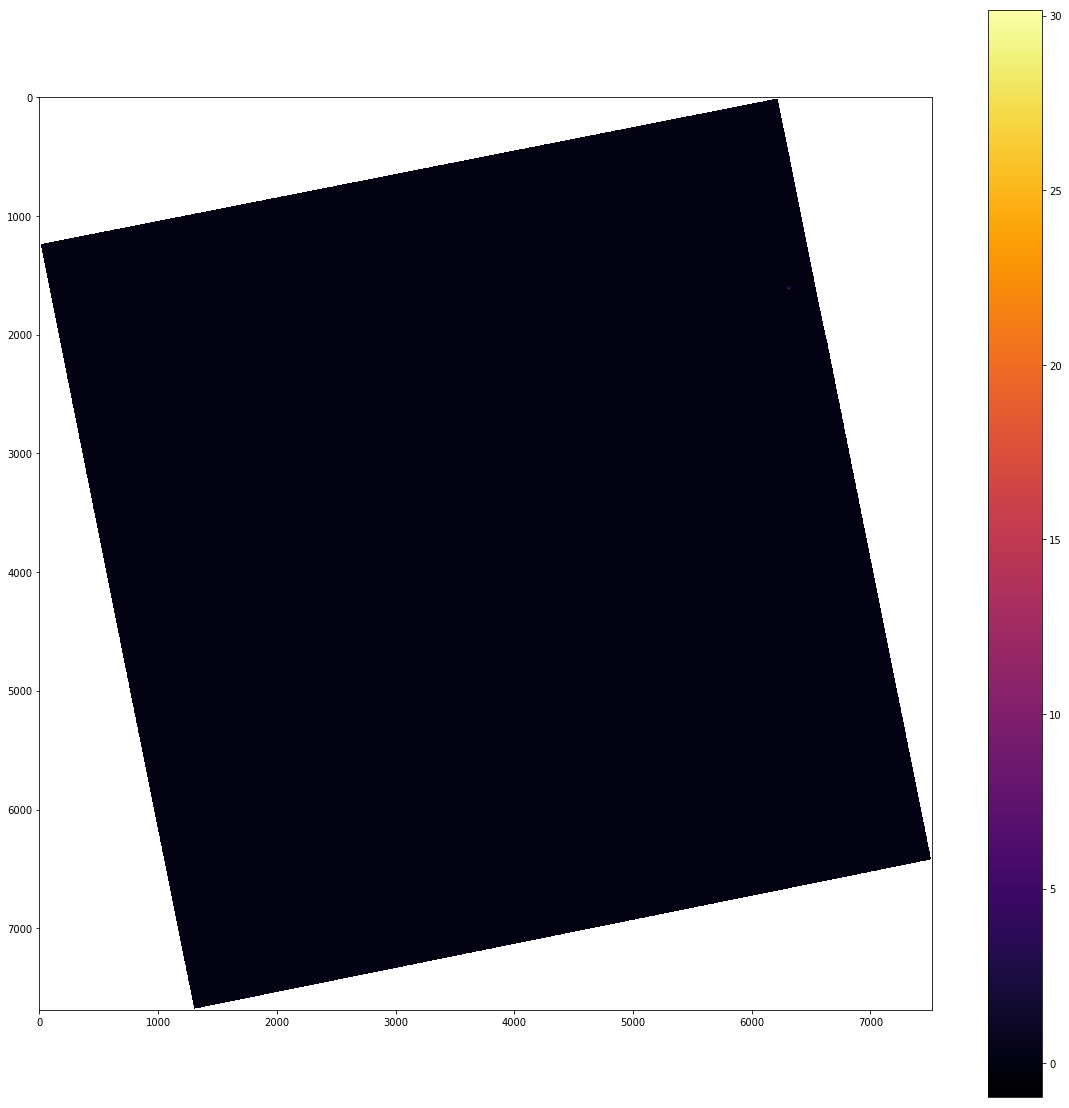

In [84]:
b7arr[b7arr == 0] = np.nan
plt.imshow(b7arr, cmap='inferno')
plt.colorbar()

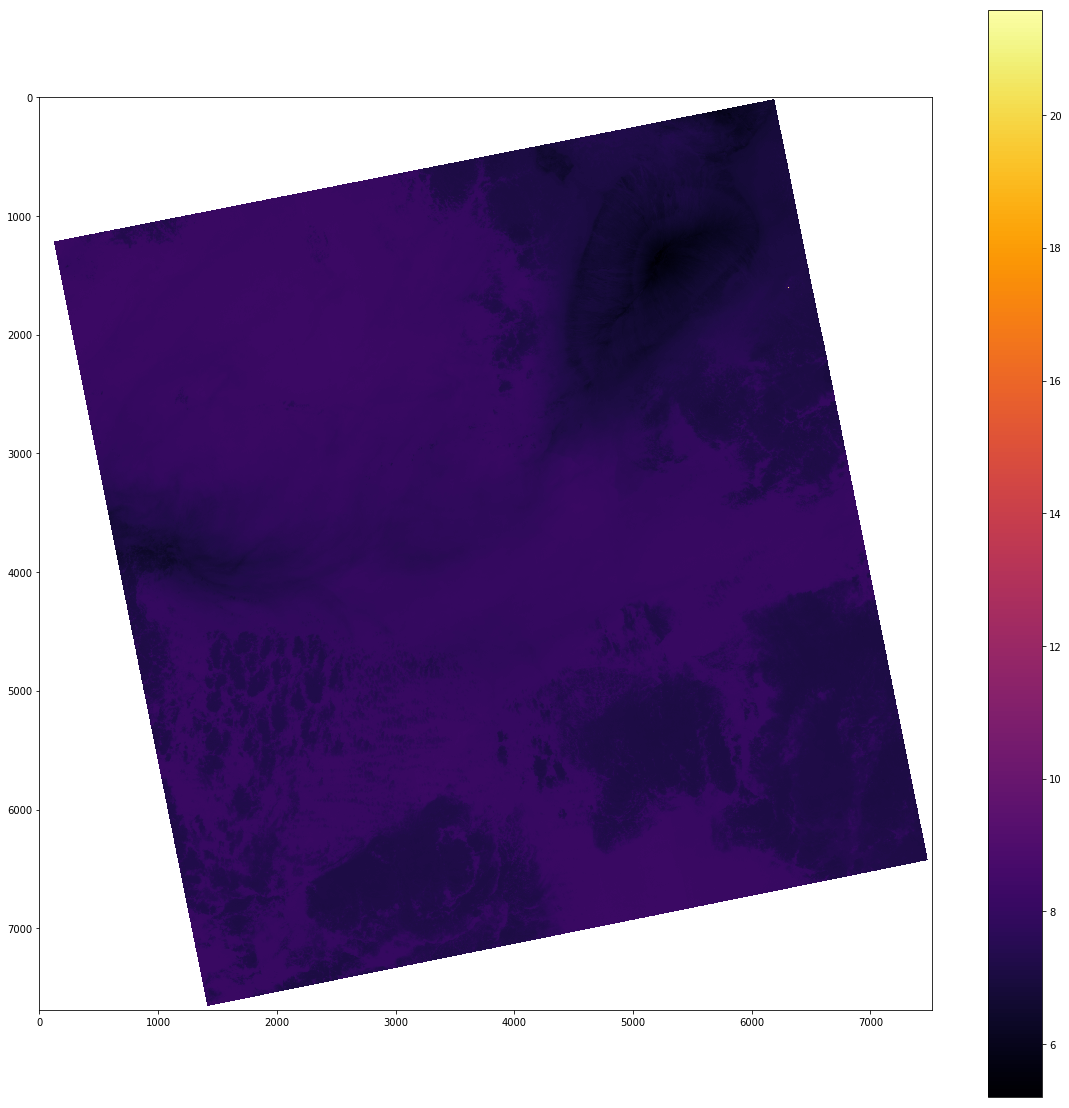

In [85]:
b11arr[b11arr == 0] = np.nan
plt.imshow(b11arr, cmap='inferno')
plt.colorbar()

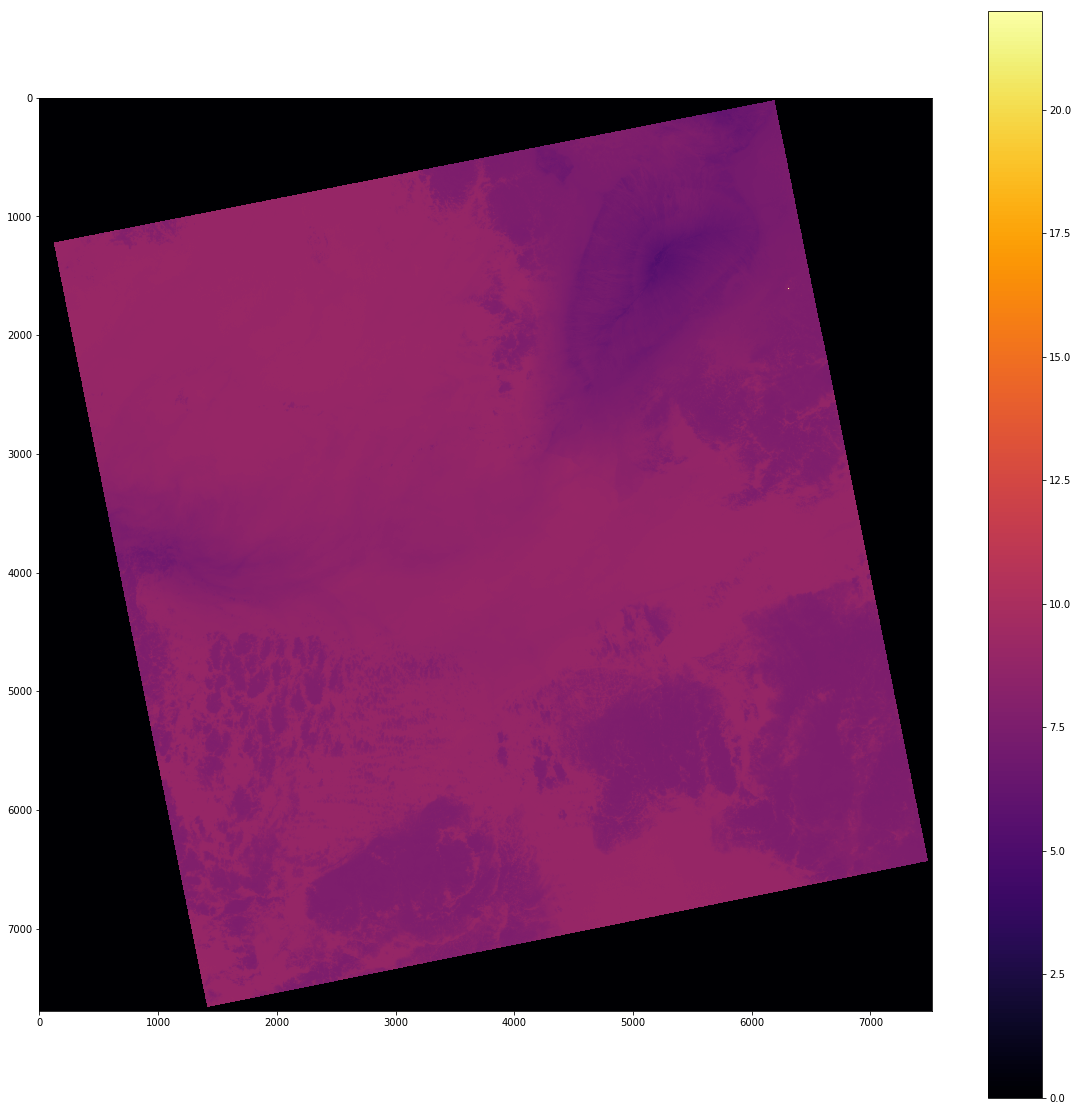

In [86]:
b10arr[b11arr == 0] = np.nan
plt.imshow(b10arr, cmap='inferno')
plt.colorbar()

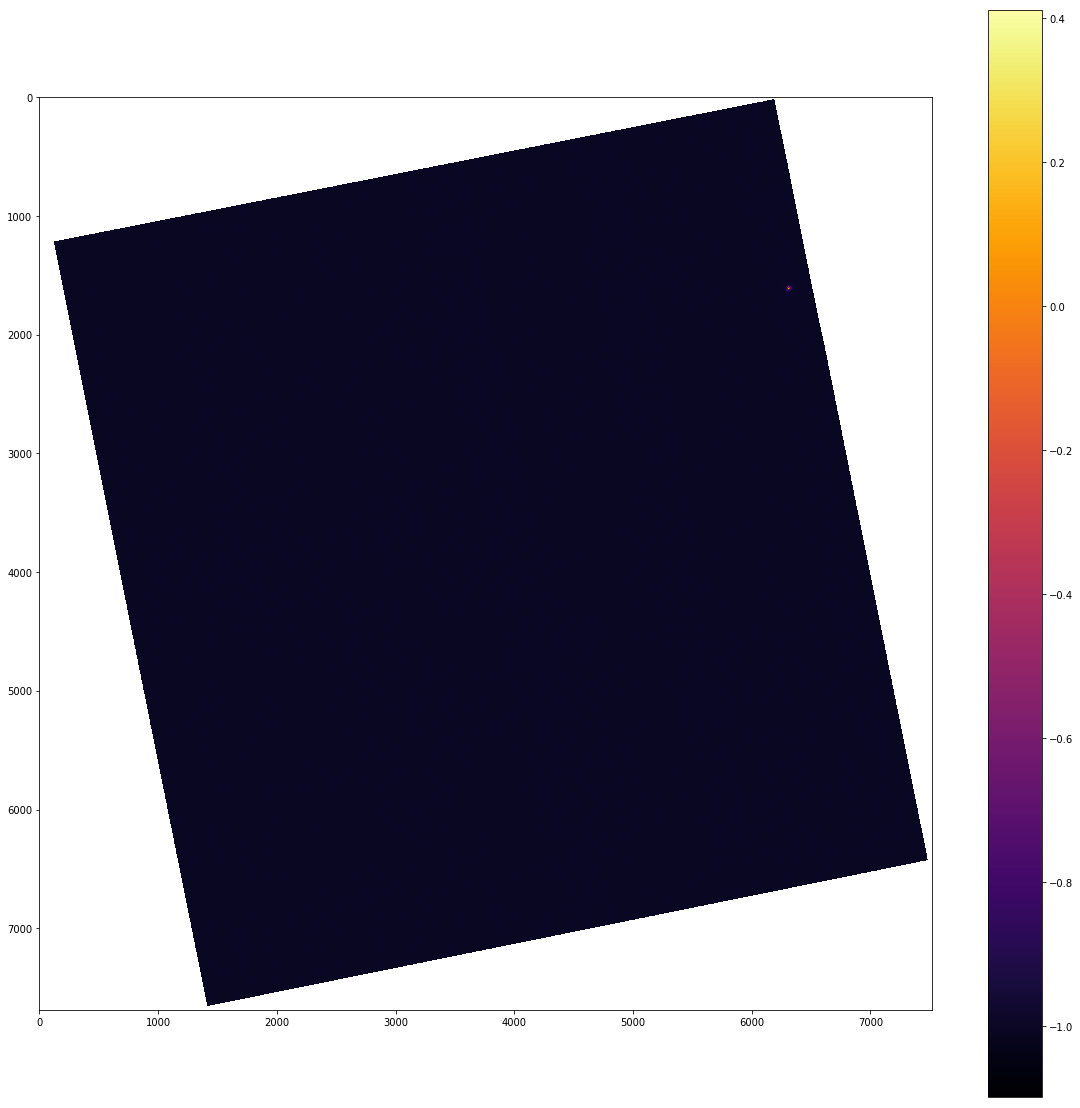

In [72]:
nti = (b7arr - b11arr)/(b7arr + b11arr)
plt.imshow(nti, cmap='inferno')
plt.colorbar()

In [73]:
anomolies = np.empty(nti.shape)
anomolies[:] = False
anomolies[np.isnan(nti)] = np.nan
anomolies[nti > -0.8] = True

/Users/krodriguez-pr/anaconda3/envs/numel/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


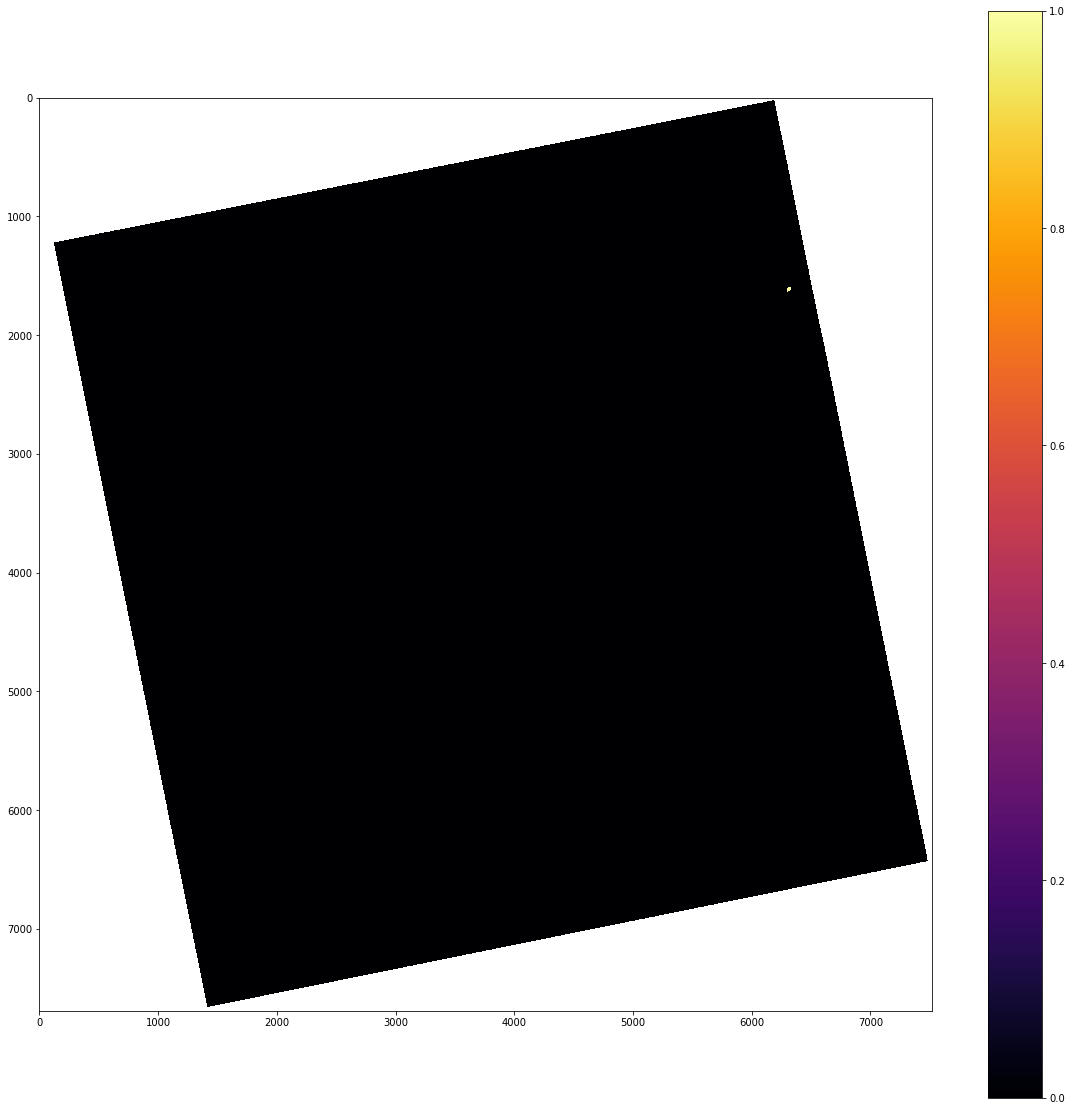

In [77]:
plt.imshow(anomolies, cmap='inferno')
plt.colorbar()

In [78]:
hot = anomolies

def pixels_to_latlon(geodataset, locs):
    coords = []
    for loc in locs:
        coords.append(b11.pixel_to_latlon(loc[0], loc[1]))
    return coords

In [79]:
locs = np.argwhere(hot == True)
pixels_to_latlon(b11, coords)

[(19.85031133303491, -157.0885836377578),
 (19.8503112598164, -157.08858355698032),
 (19.850311256543158, -157.08858363428172),
 (19.85031125326995, -157.08858371158308),
 (19.850311249996757, -157.08858378888448),
 (19.8503112467236, -157.08858386618584),
 (19.85031124345046, -157.08858394348724),
 (19.850311233631214, -157.08858417539142),
 (19.850311186597654, -157.08858347620293),
 (19.850311183324507, -157.08858355350432),
 (19.85031118005138, -157.08858363080572),
 (19.850311176778288, -157.0885837081071),
 (19.850311173505215, -157.08858378540853),
 (19.850311170232175, -157.08858386270995),
 (19.85031116695915, -157.08858394001135),
 (19.850311160413195, -157.0885840946142),
 (19.850311157140254, -157.0885841719156),
 (19.85031115386734, -157.08858424921704),
 (19.85031111010562, -157.088583472727),
 (19.85031110683258, -157.08858355002843),
 (19.850311103559573, -157.08858362732985),
 (19.8503111002866, -157.08858370463128),
 (19.85031109701364, -157.08858378193273),
 (19.8503